#**Exercício 1**
Resolver os exercícios fornecidos do livro “Inteligência Computacional”

In [ ]:
#Instalando pacote skfuzzy e networkx
!pip install networkx==2.3
!pip install scikit-fuzzy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=99496adc3e49019c436b3c1cb6691c4eab5e397e013305356a3447ebcd31bd2c
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████

In [ ]:
#18

import numpy as npy
import skfuzzy as fzzy
from skfuzzy import control as ctrl

temp_ambiente = ctrl.Antecedent(npy.arange(15, 45, 1), 'temp_ambiente')
prec_unit = ctrl.Antecedent(npy.arange(1, 6, 1), 'prec_unit')
saida = ctrl.Consequent(npy.arange(500, 6000, 1), 'saida')

temp_ambiente['baixa'] = fzzy.gaussmf(temp_ambiente.universe, 6.369, 15)
temp_ambiente['média'] = fzzy.gaussmf(temp_ambiente.universe, 6.369, 30)
temp_ambiente['alta'] = fzzy.gaussmf(temp_ambiente.universe, 6.369, 45)

prec_unit['baixo'] = fzzy.gaussmf(prec_unit.universe, 1.061, 1)
prec_unit['médio'] = fzzy.gaussmf(prec_unit.universe, 1.061, 3.05)
prec_unit['alto'] = fzzy.gaussmf(prec_unit.universe, 1.061, 6)

saida['grande'] = fzzy.trimf(saida.universe, [-2250, 500, 3250])
saida['médio'] = fzzy.trimf(saida.universe, [500, 3250, 6000])
saida['pequeno'] = fzzy.trimf(saida.universe, [3250, 6000, 8750])


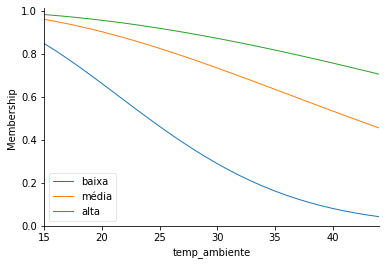

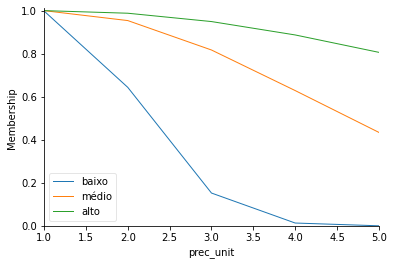

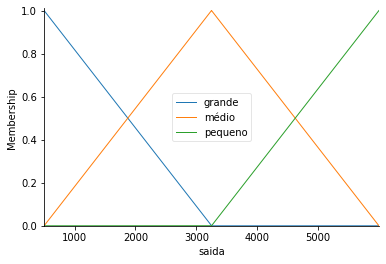

In [ ]:
temp_ambiente.view()
prec_unit.view()
saida.view()

In [ ]:
regra1 = ctrl.Rule(temp_ambiente['baixa'] & prec_unit['baixo'], saida['grande'])
regra2 = ctrl.Rule(temp_ambiente['baixa'] & prec_unit['médio'], saida['médio'])
regra3 = ctrl.Rule(temp_ambiente['baixa'] & prec_unit['alto'], saida['pequeno'])
regra4 = ctrl.Rule(temp_ambiente['média'] & prec_unit['baixo'], saida['grande'])
regra5 = ctrl.Rule(temp_ambiente['média'] & prec_unit['médio'], saida['médio'])
regra6 = ctrl.Rule(temp_ambiente['média'] & prec_unit['alto'], saida['pequeno'])
regra7 = ctrl.Rule(temp_ambiente['alta'] & prec_unit['baixo'], saida['grande'])
regra8 = ctrl.Rule(temp_ambiente['alta'] & prec_unit['médio'], saida['médio'])
regra9 = ctrl.Rule(temp_ambiente['alta'] & prec_unit['alto'], saida['pequeno'])

In [ ]:
consumo_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
consumo_simulator = ctrl.ControlSystemSimulation(consumo_ctrl)

consumo_simulator.input['temp_ambiente'] = 30
consumo_simulator.input['prec_unit'] = 3.5

consumo_simulator.compute()
print(consumo_simulator.output['saida'])

3713.196996812321


In [ ]:
#19

preco = ctrl.Antecedent(npy.arange(3, 18, 1), 'preco')
satisfacao = ctrl.Antecedent(npy.arange(0, 1, 0.1), 'satisfacao')
nivel_vendas = ctrl.Consequent(npy.arange(-35, 80, 0.125), 'nivel_vendas')

preco['baixo'] = fzzy.trimf(preco.universe, [-4.5, 3, 10.5])
preco['medio'] = fzzy.trimf(preco.universe, [3, 10.5, 18])
preco['alto'] = fzzy.trimf(preco.universe, [10.5, 18, 25.5])

satisfacao['baixa'] = fzzy.gaussmf(satisfacao.universe, 0.2123, 0)
satisfacao['media'] = fzzy.gaussmf(satisfacao.universe, 0.2123, 0.5)
satisfacao['alta'] = fzzy.gaussmf(satisfacao.universe, 0.2123, 1)

nivel_vendas['mf1'] = fzzy.gaussmf(nivel_vendas.universe, 0, 0)
nivel_vendas['mf2'] = fzzy.gaussmf(nivel_vendas.universe, 0.125, 0.125)
nivel_vendas['mf3'] = fzzy.gaussmf(nivel_vendas.universe, 0.25, 0.25)
nivel_vendas['mf4'] = fzzy.gaussmf(nivel_vendas.universe, 0.375, 0.375)
nivel_vendas['mf5'] = fzzy.gaussmf(nivel_vendas.universe, 0.5, 0.5)
nivel_vendas['mf6'] = fzzy.gaussmf(nivel_vendas.universe, 0.625, 0.625)
nivel_vendas['mf7'] = fzzy.gaussmf(nivel_vendas.universe, 0.75, 0.75)
nivel_vendas['mf8'] = fzzy.gaussmf(nivel_vendas.universe, 0.875, 0.875)
nivel_vendas['mf9'] = fzzy.gaussmf(nivel_vendas.universe, 1, 1)


/usr/local/lib/python3.7/dist-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))
/usr/local/lib/python3.7/dist-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))


In [ ]:
IIregra1 = ctrl.Rule(preco['baixo'] & satisfacao['baixa'], nivel_vendas['mf2'])
IIregra2 = ctrl.Rule(preco['baixo'] & satisfacao['media'], nivel_vendas['mf4'])
IIregra3 = ctrl.Rule(preco['baixo'] & satisfacao['alta'], nivel_vendas['mf6'])
IIregra4 = ctrl.Rule(preco['medio'] & satisfacao['baixa'], nivel_vendas['mf1'])
IIregra5 = ctrl.Rule(preco['medio'] & satisfacao['media'], nivel_vendas['mf5'])
IIregra6 = ctrl.Rule(preco['medio'] & satisfacao['alta'], nivel_vendas['mf8'])
IIregra7 = ctrl.Rule(preco['alto'] & satisfacao['baixa'], nivel_vendas['mf2'])
IIregra8 = ctrl.Rule(preco['alto'] & satisfacao['media'], nivel_vendas['mf4'])
IIregra9 = ctrl.Rule(preco['alto'] & satisfacao['alta'], nivel_vendas['mf2'])

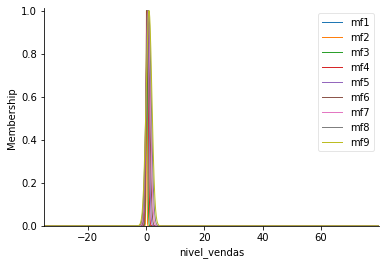

In [ ]:
nivel_vendas.view()